# Análisis Exploratorio del Dataset de Iris

## Objetivo
Realizar un análisis exploratorio completo del dataset de Iris para entender las características de las tres especies de flores.

## Dataset
El dataset de Iris contiene medidas de 150 flores de iris de tres especies diferentes:
- Iris-setosa
- Iris-versicolor  
- Iris-virginica

### Variables:
- **SepalLengthCm**: Longitud del sépalo (cm)
- **SepalWidthCm**: Ancho del sépalo (cm)
- **PetalLengthCm**: Longitud del pétalo (cm)
- **PetalWidthCm**: Ancho del pétalo (cm)
- **Species**: Especie de iris

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# Cargar el dataset
iris_df = pd.read_csv('../datos/iris/Iris.csv')

print("📊 Dataset cargado:")
print(f"- Filas: {iris_df.shape[0]}")
print(f"- Columnas: {iris_df.shape[1]}")
print("\n📋 Primeras 5 filas:")
iris_df.head()

📊 Dataset cargado:
- Filas: 150
- Columnas: 6

📋 Primeras 5 filas:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Información básica del dataset
print("📋 Información del dataset:")
iris_df.info()

print("\n🔍 Tipos de datos:")
print(iris_df.dtypes)

print("\n❓ Valores únicos en Species:")
print(iris_df['Species'].value_counts())

📋 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

🔍 Tipos de datos:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

❓ Valores únicos en Species:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [4]:
# Estadísticas descriptivas
print("📊 Estadísticas descriptivas:")
iris_df.describe()

📊 Estadísticas descriptivas:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Verificar valores faltantes
print("🔍 Verificación de valores faltantes:")
missing_values = iris_df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No hay valores faltantes en el dataset")

🔍 Verificación de valores faltantes:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
✅ No hay valores faltantes en el dataset


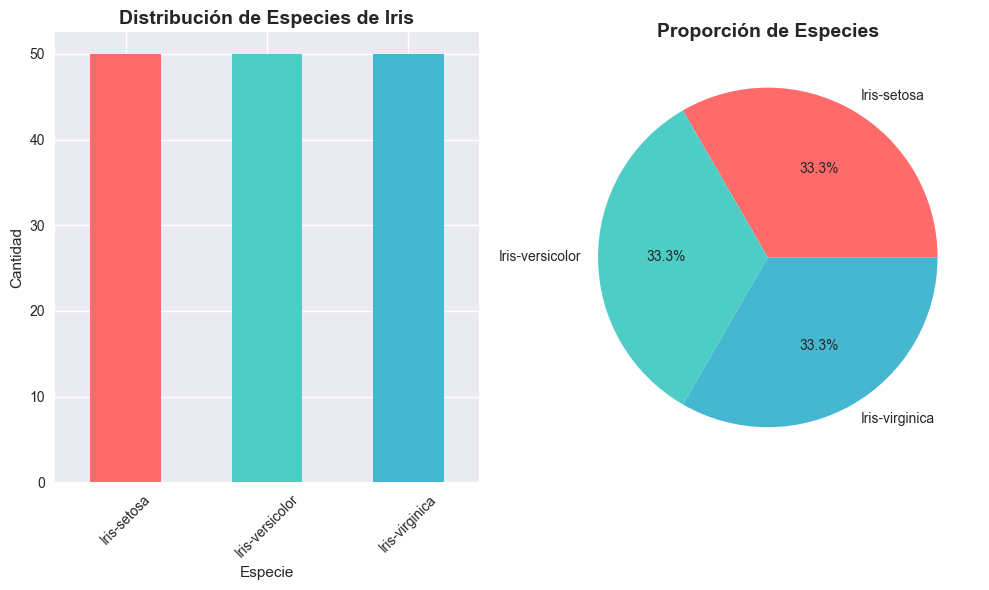

📊 Distribución de especies:
- Iris-setosa: 50 muestras (33.3%)
- Iris-versicolor: 50 muestras (33.3%)
- Iris-virginica: 50 muestras (33.3%)


In [6]:
# Distribución de especies
plt.figure(figsize=(10, 6))
species_counts = iris_df['Species'].value_counts()

plt.subplot(1, 2, 1)
species_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Distribución de Especies de Iris', fontsize=14, fontweight='bold')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Proporción de Especies', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"📊 Distribución de especies:")
for species, count in species_counts.items():
    print(f"- {species}: {count} muestras ({count/len(iris_df)*100:.1f}%)")

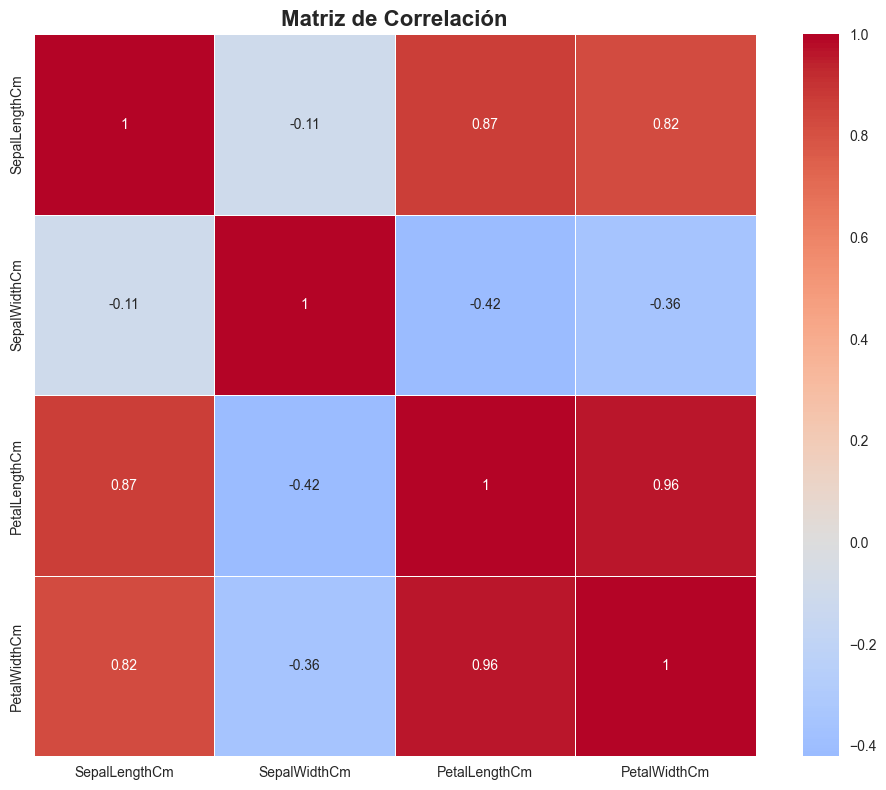

📊 Correlaciones más fuertes:
- SepalLengthCm vs SepalWidthCm: -0.109
- SepalLengthCm vs PetalLengthCm: 0.872
- SepalLengthCm vs PetalWidthCm: 0.818
- SepalWidthCm vs PetalLengthCm: -0.421
- SepalWidthCm vs PetalWidthCm: -0.357
- PetalLengthCm vs PetalWidthCm: 0.963


In [7]:
# Matriz de correlación
numeric_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
correlation_matrix = iris_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("📊 Correlaciones más fuertes:")
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        corr = correlation_matrix.iloc[i, j]
        print(f"- {numeric_columns[i]} vs {numeric_columns[j]}: {corr:.3f}")

<Figure size 1200x1000 with 0 Axes>

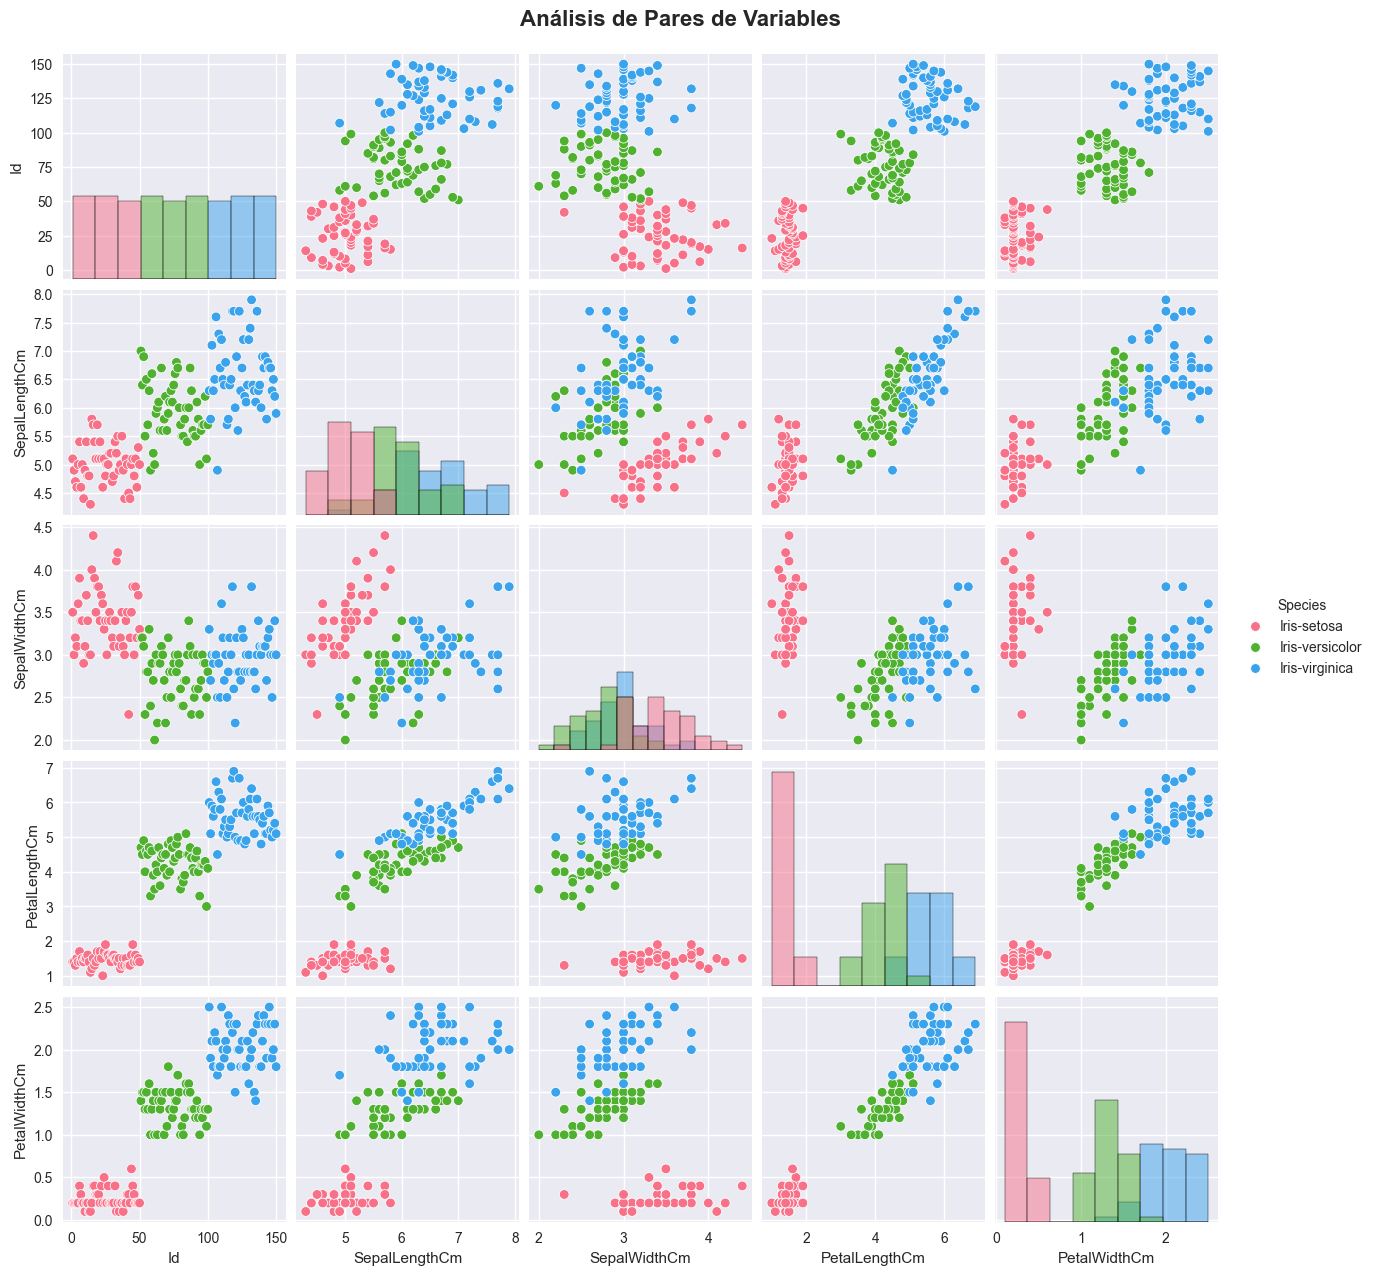

In [8]:
# Pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(iris_df, hue='Species', diag_kind='hist', palette='husl')
plt.suptitle('Análisis de Pares de Variables', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 🤖 Machine Learning - Clasificación

In [9]:
# Preparar datos para machine learning
print("🤖 Preparando datos para Machine Learning...")

# Eliminar la columna Id si existe
if 'Id' in iris_df.columns:
    iris_df = iris_df.drop('Id', axis=1)

# Separar features y target
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Datos preparados:")
print(f"  - X_train: {X_train.shape}")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"  - y_test: {y_test.shape}")

🤖 Preparando datos para Machine Learning...
✅ Datos preparados:
  - X_train: (120, 4)
  - X_test: (30, 4)
  - y_train: (120,)
  - y_test: (30,)


In [10]:
# Entrenar modelo Random Forest
print("🎯 Entrenando modelo Random Forest...")

# Entrenar modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = rf_model.predict(X_test_scaled)

# Evaluación
print("\n📊 Resultados del Modelo:")
print("=" * 40)
print(classification_report(y_test, y_pred))

🎯 Entrenando modelo Random Forest...

📊 Resultados del Modelo:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



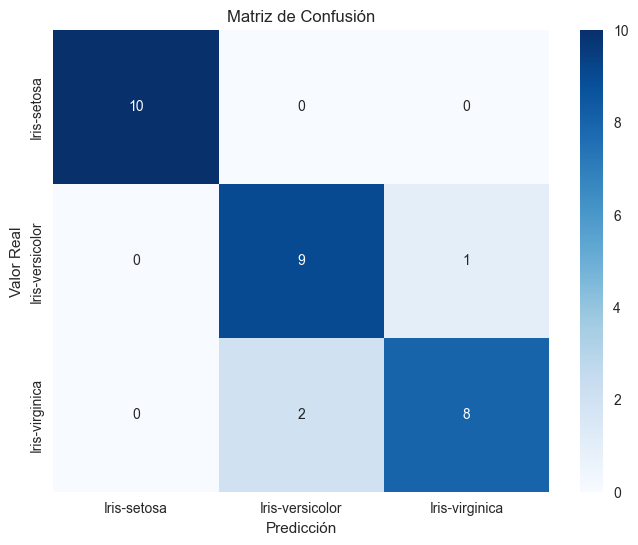

In [11]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=rf_model.classes_, 
           yticklabels=rf_model.classes_)
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

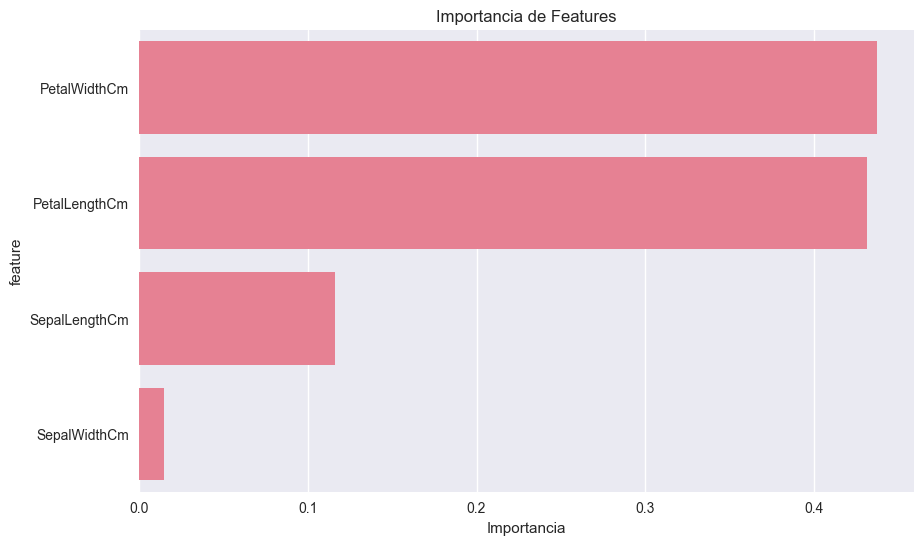


🏆 Importancia de features:
  - PetalWidthCm: 0.437
  - PetalLengthCm: 0.431
  - SepalLengthCm: 0.116
  - SepalWidthCm: 0.015


In [12]:
# Importancia de features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de Features')
plt.xlabel('Importancia')
plt.show()

print("\n🏆 Importancia de features:")
for idx, row in feature_importance.iterrows():
    print(f"  - {row['feature']}: {row['importance']:.3f}")

## 📋 Resumen del Análisis Exploratorio

### Hallazgos principales:

1. **Balance del dataset**: 50 muestras por cada especie (perfectamente balanceado)
2. **Calidad de datos**: No hay valores faltantes
3. **Correlaciones**: 
   - Fuerte correlación positiva entre PetalLength y PetalWidth (0.963)
   - Correlación moderada entre SepalLength y PetalLength (0.872)
4. **Separabilidad**: Las especies muestran diferentes patrones de mediciones
5. **Machine Learning**: Random Forest logra excelente precisión en clasificación

### Próximos pasos:
- Implementar otros algoritmos de clasificación
- Evaluar la precisión de diferentes algoritmos
- Crear visualizaciones interactivas
- Optimizar hiperparámetros del modelo